### Reading images

In [1]:
def read_image(prefix, source_path):
    #print(source_path)
    filename = source_path.split('/')[-1]
    #print(filename)
    filename = prefix + filename.split('\\')[-1]
    #print(filename)
    image = cv2.imread(filename)
    return image

In [2]:
import csv
import cv2
import numpy as np
from tqdm import tqdm

def read_dataset(prefix, images, measurements):

    lines = []
    with open( prefix + 'driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)

    #for line in lines:
    for i in tqdm(range(0, len(lines), 1)):
        steering_center = float(lines[i][3])
        # create adjusted steering measurements for the side camera images
        correction = 0.2 # this is a parameter to tune
        steering_left = steering_center + correction
        steering_right = steering_center - correction

        # Center
        images.append(read_image( prefix + 'IMG/', lines[i][0]))
        measurements.append(steering_center)
        # Left
        images.append(read_image( prefix + 'IMG/', lines[i][1]))
        measurements.append(steering_left)
        # Right
        images.append(read_image( prefix + 'IMG/', lines[i][2]))
        measurements.append(steering_right)

In [3]:
lines = []
images = []
measurements = []

# First dataset
read_dataset("./data/", images, measurements)

# # Smooth driving
# read_dataset("./smooth_driving/", images, measurements)

# #  Recovering
# read_dataset("./recovering_driving_1/", images, measurements)
# read_dataset("./recovering_driving_2/", images, measurements)
# read_dataset("./recovering_driving_3/", images, measurements)

#  Reverse driving
read_dataset("./reverse_driving/", images, measurements)

100%|██████████| 4061/4061 [00:11<00:00, 359.83it/s]


### Image augmentation

In [4]:
def image_augmentation(images, measurements):   
    augmented_images, augmented_measurements = [], []
    # for image, measurement in zip(images, measurements, len(images)):
    for i in tqdm(range(0, len(images), 1)):
        image = images[i]
        measurement = measurements[i]
        augmented_images.append(image)
        augmented_measurements.append(measurement)
        augmented_images.append(cv2.flip(image, flipCode=1))
        augmented_measurements.append(measurement*-1.0)
        
    return augmented_images, augmented_measurements

In [5]:
# from sklearn.utils import shuffle
# images, measurements = shuffle(images, measurements, random_state=0)

augmented_images, augmented_measurements = image_augmentation(images, measurements)

X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

100%|██████████| 36291/36291 [00:06<00:00, 5373.29it/s]


### Model

In [6]:
def getModel1():
    """
    Creates nVidea Autonomous Car Group model
    """
    from keras.models import Sequential
    from keras.layers import Flatten, Dense, Lambda, Dropout
    from keras.layers.convolutional import Conv2D
    from keras.layers.pooling import MaxPooling2D
    from keras.layers.convolutional import Cropping2D

    model = Sequential()
    # Normalize and mean centering the data 
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((70,25), (0,0))))
    model.add(Conv2D(24, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(96, (3, 3), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, (3, 3), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    return model

def getModel2():

    
    from keras.models import Sequential
    from keras.layers import Flatten, Dense, Lambda, Dropout
    from keras.layers.convolutional import Conv2D
    from keras.layers.pooling import MaxPooling2D
    from keras.layers.convolutional import Cropping2D

    model = Sequential()
    # Normalize and mean centering the data 
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((70,25), (0,0))))
    model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32,32,3), activation = 'relu') )
    model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
    model.add(Conv2D(64, (3, 3), padding="same", activation = 'relu'))
    model.add(Conv2D(80, (3, 3), padding="same", activation = 'relu'))
    model.add(Conv2D(96, (3, 3), padding="same", activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    return model

def getModel3():

    
    from keras.models import Sequential
    from keras.layers import Flatten, Dense, Lambda, Dropout
    from keras.layers.convolutional import Conv2D
    from keras.layers.pooling import MaxPooling2D
    from keras.layers.convolutional import Cropping2D

    model = Sequential()
    # Normalize and mean centering the data 
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((70,25), (0,0))))
    model.add(Conv2D(24, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(36, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    return model

In [7]:
def drawTrainingLoss(history_object):
    from keras.models import Model
    import matplotlib.pyplot as plt

    ### print the keys contained in the history object
    print(history_object.history.keys())

    ### plot the training and validation loss for each epoch
    plt.plot(history_object.history['loss'])
    plt.plot(history_object.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.show()

Using TensorFlow backend.


Train on 58065 samples, validate on 14517 samples
Epoch 1/5
283s - loss: 0.0181 - val_loss: 0.0174
Epoch 2/5
284s - loss: 0.0154 - val_loss: 0.0177
Epoch 3/5
287s - loss: 0.0141 - val_loss: 0.0179
Epoch 4/5
287s - loss: 0.0131 - val_loss: 0.0184
Epoch 5/5
288s - loss: 0.0122 - val_loss: 0.0183
dict_keys(['val_loss', 'loss'])


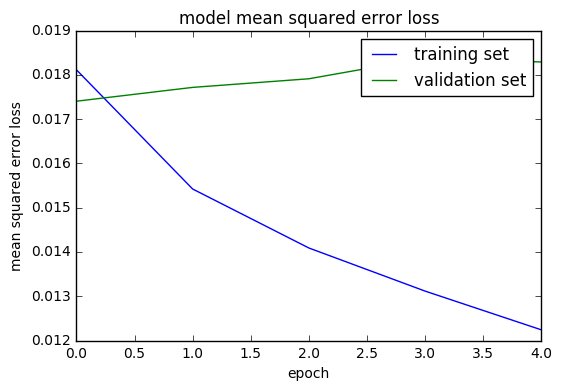

In [8]:
# Get network
model = getModel3()
# Training
history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5, verbose = 2, batch_size=32)
# Save modehistory_objectsave('model.h5')
drawTrainingLoss(history_object)
model.save('model_3.h5')

In [9]:
def getModel4():

    
    from keras.models import Sequential
    from keras.layers import Flatten, Dense, Lambda, Dropout
    from keras.layers.convolutional import Conv2D
    from keras.layers.pooling import MaxPooling2D
    from keras.layers.convolutional import Cropping2D

    model = Sequential()
    # Normalize and mean centering the data 
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((70,25), (0,0))))
    model.add(Conv2D(24, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(36, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(10))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    return model

Train on 58065 samples, validate on 14517 samples
Epoch 1/5
289s - loss: 0.0219 - val_loss: 0.0182
Epoch 2/5
289s - loss: 0.0193 - val_loss: 0.0175
Epoch 3/5
288s - loss: 0.0181 - val_loss: 0.0174
Epoch 4/5
288s - loss: 0.0173 - val_loss: 0.0174
Epoch 5/5
289s - loss: 0.0165 - val_loss: 0.0200
dict_keys(['val_loss', 'loss'])


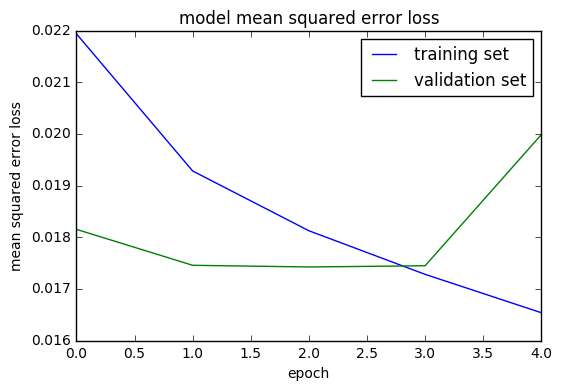

In [10]:
# Get network
model = getModel4()
# Training
history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5, verbose = 2, batch_size=32)
# Save modehistory_objectsave('model.h5')
drawTrainingLoss(history_object)
model.save('model_4.h5')

In [11]:
def getModel5():

    
    from keras.models import Sequential
    from keras.layers import Flatten, Dense, Lambda, Dropout
    from keras.layers.convolutional import Conv2D
    from keras.layers.pooling import MaxPooling2D
    from keras.layers.convolutional import Cropping2D

    model = Sequential()
    # Normalize and mean centering the data 
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((70,25), (0,0))))
    model.add(Conv2D(24, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(36, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    return model

Train on 58065 samples, validate on 14517 samples
Epoch 1/5
289s - loss: 0.0229 - val_loss: 0.0203
Epoch 2/5
290s - loss: 0.0200 - val_loss: 0.0175
Epoch 3/5
289s - loss: 0.0188 - val_loss: 0.0187
Epoch 4/5
289s - loss: 0.0179 - val_loss: 0.0182
Epoch 5/5
290s - loss: 0.0172 - val_loss: 0.0215
dict_keys(['val_loss', 'loss'])


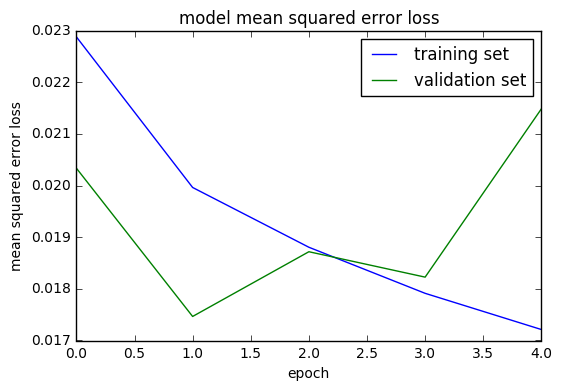

In [12]:
# Get network
model = getModel5()
# Training
history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5, verbose = 2, batch_size=32)
# Save modehistory_objectsave('model.h5')
drawTrainingLoss(history_object)
model.save('model_5.h5')

In [13]:
def getModel6():

    
    from keras.models import Sequential
    from keras.layers import Flatten, Dense, Lambda, Dropout
    from keras.layers.convolutional import Conv2D
    from keras.layers.pooling import MaxPooling2D
    from keras.layers.convolutional import Cropping2D

    model = Sequential()
    # Normalize and mean centering the data 
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((70,25), (0,0))))
    model.add(Conv2D(24, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(36, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dropout(0.5))
    model.add(Dense(50))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    return model

Train on 58065 samples, validate on 14517 samples
Epoch 1/5
291s - loss: 0.0247 - val_loss: 0.0178
Epoch 2/5
292s - loss: 0.0206 - val_loss: 0.0177
Epoch 3/5
291s - loss: 0.0197 - val_loss: 0.0186
Epoch 4/5
292s - loss: 0.0186 - val_loss: 0.0179
Epoch 5/5
292s - loss: 0.0185 - val_loss: 0.0194
dict_keys(['val_loss', 'loss'])


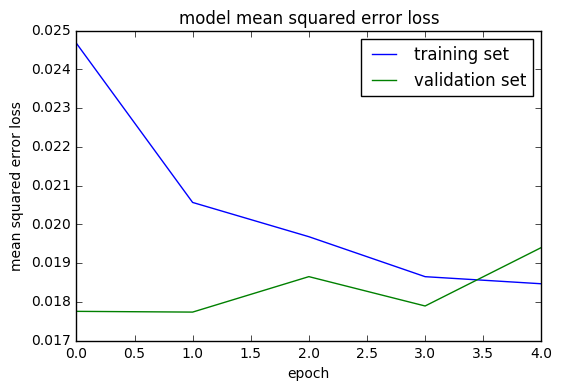

In [14]:
# Get network
model = getModel6()
# Training
history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5, verbose = 2, batch_size=32)
# Save modehistory_objectsave('model.h5')
drawTrainingLoss(history_object)
model.save('model_6.h5')

In [15]:
def getModel7():

    
    from keras.models import Sequential
    from keras.layers import Flatten, Dense, Lambda, Dropout
    from keras.layers.convolutional import Conv2D
    from keras.layers.pooling import MaxPooling2D
    from keras.layers.convolutional import Cropping2D

    model = Sequential()
    # Normalize and mean centering the data 
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((70,25), (0,0))))
    model.add(Conv2D(24, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(36, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dropout(0.5))
    model.add(Dense(50))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    return model

Train on 58065 samples, validate on 14517 samples
Epoch 1/5
294s - loss: 0.0255 - val_loss: 0.0199
Epoch 2/5
294s - loss: 0.0213 - val_loss: 0.0221
Epoch 3/5
294s - loss: 0.0204 - val_loss: 0.0179
Epoch 4/5
294s - loss: 0.0198 - val_loss: 0.0188
Epoch 5/5
294s - loss: 0.0191 - val_loss: 0.0175
dict_keys(['val_loss', 'loss'])


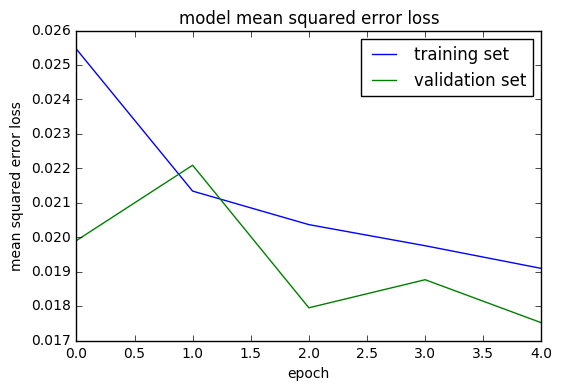

In [16]:
# Get network
model = getModel7()
# Training
history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5, verbose = 2, batch_size=32)
# Save modehistory_objectsave('model.h5')
drawTrainingLoss(history_object)
model.save('model_7.h5')

In [17]:
def getModel8():

    
    from keras.models import Sequential
    from keras.layers import Flatten, Dense, Lambda, Dropout
    from keras.layers.convolutional import Conv2D
    from keras.layers.pooling import MaxPooling2D
    from keras.layers.convolutional import Cropping2D

    model = Sequential()
    # Normalize and mean centering the data 
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((70,25), (0,0))))
    model.add(Conv2D(24, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(36, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dropout(0.5))
    model.add(Dense(50))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    return model

Train on 58065 samples, validate on 14517 samples
Epoch 1/5
300s - loss: 0.0258 - val_loss: 0.0221
Epoch 2/5
301s - loss: 0.0222 - val_loss: 0.0214
Epoch 3/5
302s - loss: 0.0213 - val_loss: 0.0197
Epoch 4/5
302s - loss: 0.0208 - val_loss: 0.0205
Epoch 5/5
302s - loss: 0.0205 - val_loss: 0.0205
dict_keys(['val_loss', 'loss'])


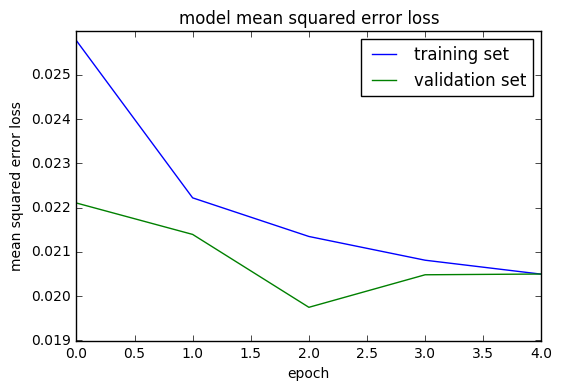

In [18]:
# Get network
model = getModel8()
# Training
history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5, verbose = 2, batch_size=32)
# Save modehistory_objectsave('model.h5')
drawTrainingLoss(history_object)
model.save('model_8.h5')

In [19]:
def getModel9():

    
    from keras.models import Sequential
    from keras.layers import Flatten, Dense, Lambda, Dropout
    from keras.layers.convolutional import Conv2D
    from keras.layers.pooling import MaxPooling2D
    from keras.layers.convolutional import Cropping2D

    model = Sequential()
    # Normalize and mean centering the data 
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((70,25), (0,0))))
    model.add(Conv2D(24, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Conv2D(36, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dropout(0.5))
    model.add(Dense(50))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    return model

Train on 58065 samples, validate on 14517 samples
Epoch 1/5
315s - loss: 0.0267 - val_loss: 0.0234
Epoch 2/5
318s - loss: 0.0228 - val_loss: 0.0222
Epoch 3/5
319s - loss: 0.0219 - val_loss: 0.0225
Epoch 4/5
319s - loss: 0.0215 - val_loss: 0.0212
Epoch 5/5
320s - loss: 0.0214 - val_loss: 0.0215
dict_keys(['val_loss', 'loss'])


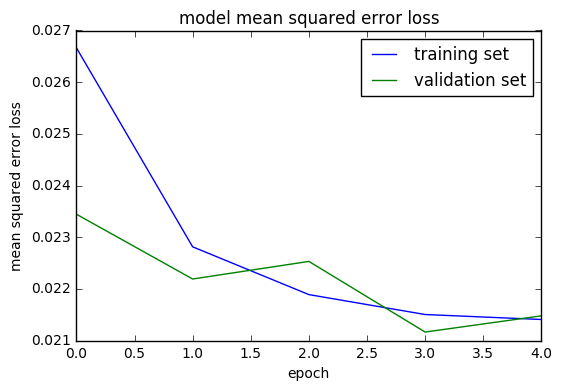

In [20]:
# Get network
model = getModel9()
# Training
history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5, verbose = 2, batch_size=32)
# Save modehistory_objectsave('model.h5')
drawTrainingLoss(history_object)
model.save('model_9.h5')

In [21]:
def getModel10():

    
    from keras.models import Sequential
    from keras.layers import Flatten, Dense, Lambda, Dropout
    from keras.layers.convolutional import Conv2D
    from keras.layers.pooling import MaxPooling2D
    from keras.layers.convolutional import Cropping2D

    model = Sequential()
    # Normalize and mean centering the data 
    model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((70,25), (0,0))))
    model.add(Conv2D(24, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(36, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dropout(0.5))
    model.add(Dense(50))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    
    return model

Train on 58065 samples, validate on 14517 samples
Epoch 1/5
350s - loss: 0.0275 - val_loss: 0.0320
Epoch 2/5
352s - loss: 0.0237 - val_loss: 0.0293
Epoch 3/5
352s - loss: 0.0227 - val_loss: 0.0317
Epoch 4/5
354s - loss: 0.0222 - val_loss: 0.0284
Epoch 5/5
355s - loss: 0.0217 - val_loss: 0.0271
dict_keys(['val_loss', 'loss'])


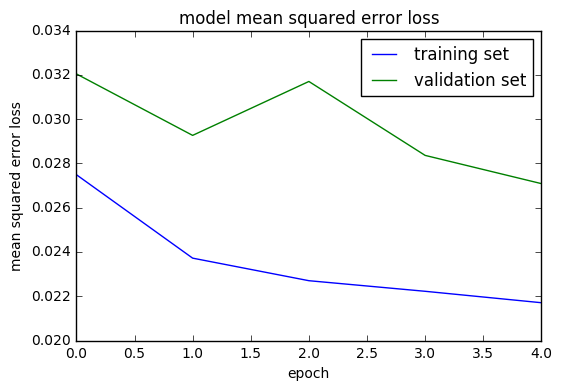

In [22]:
# Get network
model = getModel10()
# Training
history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=5, verbose = 2, batch_size=32)
# Save modehistory_objectsave('model.h5')
drawTrainingLoss(history_object)
model.save('model_10.h5')